# Latar Belakang

Transportation Security Administration (TSA) adalah lembaga pemerintah federal yang bertanggung jawab untuk menjamin keamanan penerbangan di Amerika Serikat. TSA dibentuk setelah serangan teroris pada 11 September 2001 dengan tujuan untuk melindungi penerbangan dari serangan teroris dan keamanan penerbangan lainnya. **TSA bertanggung jawab untuk menjamin keamanan penerbangan di Amerika Serikat** dengan melakukan tindakan preventif, mengevaluasi risiko, dan melakukan inspeksi pada kendaraan, paket, dan pengiriman barang yang diterima di bandara.

Salah satu bentuk yang bisa diajukan konsumen untuk mengklaim kerugian akibat kelalaian TSA adalah TSA claims. Transportation Security Administration (TSA) claims adalah tuntutan hukum yang diajukan oleh individu atau perusahaan yang mengklaim kerugian atau kerusakan yang diderita sebagai akibat dari tindakan atau kelalaian oleh pegawai TSA.


# Pernyataan Masalah

Dengan adanya data klaim tersebut TSA ingin mengetahui bandara mana saja yang memiliki jumlah pengajuan klaim terbanyak. Informasi ini dapat membantu TSA dalam mengerucutkan bandara-bandara mana saja yang membutuhkan peningkatan kinerja sistem keamanannya, sehingga dapat mengurangi frekuensi klaim yang diajukan kepada TSA.

Sebagai *data analyst* kita akan berusaha menjawab pertanyaan berikut:

**"Bagaimana karakteristik data pengajuan klaim yang dibuat oleh para penumpang?"**

Dari pernyataan masalah di atas, saya akan mencoba membedah lebih mendalam kepada beberapa masalah, yaitu:

* Berapa total klaim dari tahun 2002-2015?
* Berapa total klaim yang diajukan kepada setiap bandara?
* Bandara mana saja yang menerima klaim paling banyak?
* Jenis klaim tertinggi apa yang diajukan di setiap bandara tersebut?
* Dimana saja lokasi yang paling sering terjadi pelaporan klaim di dalam bandara tersebut?

# Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('tsa_claims.csv')
display(df.head(), df.tail())

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Personal Accessories,-,-,NaN,NaN


Dataset ini berisi informasi terkait, tanggal pengajuan klaim, tanggal kejadian kasus, data id dan nama bandara, data maskapai udara, jenis klaim, dan status akhir dari klaim pelapor. Ada 13 kolom di dalam dataset ini, yaitu:

* **Claim Number**: ID unik untuk setiap klaim
* **Data received**: Tanggal diterima aduan terhadap TSA
* **Incident date**: Tanggal kejadian kasus pelapor
* **Airport code**: ID unik bandara
* **Airport name**: Nama bandara
* **Airlines name**: Nama maskapai penerbangan
* **Claim Type**: Jenis klaim yang diajukan pelapor
* **Claim Site**: Lokasi pengajuan laporan
* **Item**: Jenis barang yang dilaporkan
* **Claim Amount**: Nominal biaya yang diajukan pelapor (Dollar AS)
* **Status**: Status progress laporan klaim
* **Close Amount**: Nominal biaya ganti rugi oleh TSA (Dollar AS)
* **Disposition**: Status akhir dari laporan klaim

## Data Understanding

In [3]:
# Mengecheck informasi umum yang ada didalam data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


In [4]:
df.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204258,4007,26807,465,485,318,11,6,4704,36117,15,17162,3
top,2013121110011,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


In [5]:
#  Mengecheck data yang hilang pada setiap kolom

df.isna().sum().sort_values(ascending=False)

Disposition      72908
Close Amount     68952
Airline Name     34374
Airport Code      8524
Airport Name      8524
Claim Type        7913
Claim Amount      4043
Item              3966
Incident Date     2183
Claim Site         740
Date Received      263
Status               5
Claim Number         0
dtype: int64

## Data Duplicates

In [6]:
pd.set_option('display.max_colwidth', -1)

# Mengecheck data unik di setiap kolom

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   Claim Number   204258             
1   Date Received  4007               
2   Incident Date  26807              
3   Airport Code   465                
4   Airport Name   485                
5   Airline Name   318                
6   Claim Type     11                 
7   Claim Site     6                  
8   Item           4704               
9   Claim Amount   36117              
10  Status         15                 
11  Close Amount   17162              
12  Disposition    3                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [7]:
df[df.duplicated(keep=False)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
16841,2004050450432,26-Sep-03,9/13/2003 0:00,NaN,NaN,NaN,Property Damage,Checked Baggage,DVD/CD Players,$31.96,Canceled,NaN,NaN
16842,2004050450432,26-Sep-03,9/13/2003 0:00,NaN,NaN,NaN,Property Damage,Checked Baggage,DVD/CD Players,$31.96,Canceled,NaN,NaN


In [8]:
df = df.drop_duplicates()
df.shape

(204266, 13)

Dari data yang telah kita olah kita dapat mendapatkan informasi sebagai berikut:

* Dataset TSA Claims memiliki jumlah baris **204.266** dan kolom **13**
* Terdapat 2 baris duplikat, sehingga kita bisa drop data tersebut
* Missing values terdapat pada semua kolom, kecuali **Claim Number**
* **Claim Number**: Kita bisa menghapus kolom ini, karena tidak dibutuhkan dalam analisis
* **Data received** dan **Incident date**: Tipe data tidak sesuai (object), sehingga kita bisa ubah tipenya (DateTime)
* **Airport name** dan **Airport code** : Terdapat beberapa duplikat value di kolom Airport Name, dimana value tersebut berkorelasi dengan value yang sama di kolom Airport Code. Harus dilakukan analisa lebih lanjut pada kolom Airline Name karena ada beberapa value yang memiliki kemiripan dalam penulisan kolom item berisikan jenis barang yang dilaporkan dimana kita bisa analisa lebih lanjut
* **Item**: Jenis barang yang dilaporkan
* **Claim Amount** dan **Close Amount**: Tipe data tidak sesuai (object), sehingga kita bisa ubah tipenya (numerik)
   

## Missing Values

In [9]:
df.isna().sum().sort_values(ascending=False)

Disposition      72907
Close Amount     68951
Airline Name     34373
Airport Code     8523 
Airport Name     8523 
Claim Type       7913 
Claim Amount     4043 
Item             3966 
Incident Date    2183 
Claim Site       740  
Date Received    263  
Status           5    
Claim Number     0    
dtype: int64

In [10]:
# Persentase missing values pada total data
(df.isna().sum()/len(df)*100).sort_values(ascending=False)

Disposition      35.692186
Close Amount     33.755495
Airline Name     16.827568
Airport Code     4.172501 
Airport Name     4.172501 
Claim Type       3.873870 
Claim Amount     1.979282 
Item             1.941586 
Incident Date    1.068705 
Claim Site       0.362273 
Date Received    0.128754 
Status           0.002448 
Claim Number     0.000000 
dtype: float64

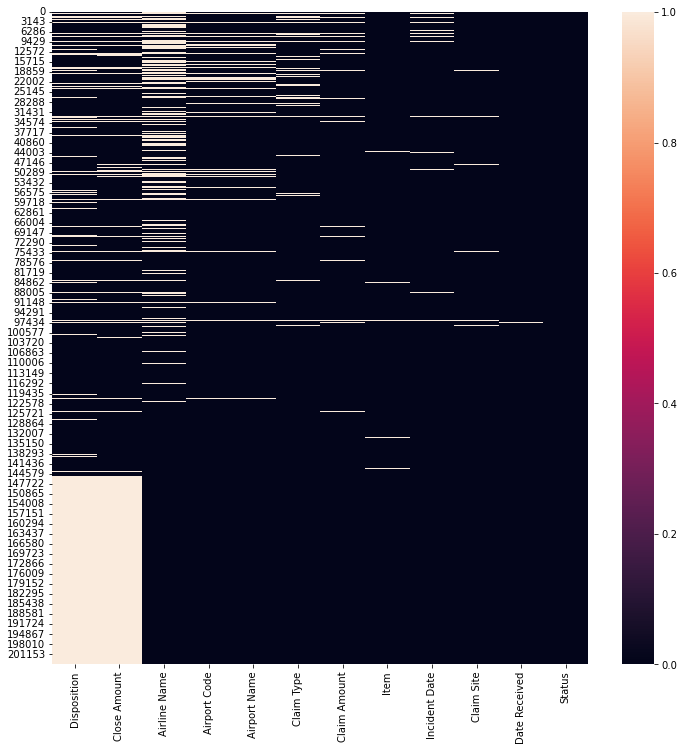

In [11]:
# Visualisasi heatmap distribusi data

plt.figure(figsize=(12,12))
sns.heatmap(df[['Disposition','Close Amount','Airline Name','Airport Code','Airport Name','Claim Type','Claim Amount','Item','Incident Date','Claim Site','Date Received','Status']].isna());

Dari analisa awal data *missing values* di atas, informasi yang didapatkan secara garis besar adalah:

* Missing Value di kolom **Airline Name, Close Amount, dan Disposition** memiliki proporsi yang cukup besar (>15%), dengan kolom **Disposition** menjadi yang terbesar dengan persentase Missing Value mencapai **35,6%.**
* Namun karena data kolom Close Amount dan Disposition tidak relevan dengan pernyataan masalah yang akan kita uraikan dari analisis kita, maka kita bisa menghapus kedua kolom tersebut.

Ada 2 opsi yang dapat dilakukan untuk menangani Missing Value:

* Opsi pertama dengan menghapus baris atau kolom yang berisi Missing Value.
* Opsi kedua dengan mengisi data yang hilang. Cara ini lebih diutamakan dalam kasus ini. Beberapa metode bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi value yang hilang dengan value yang sebenarnya, atau sedekat mungkin nilai asli. Jika masih ada data yang tidak terisi, kita bisa menggunakan angka mean, median, atau modus. Menghapus akan menjadi pilihan terakhir.

# Data Cleaning

## Airport Name dan Airport Code

Kolom Airport Code dan Aiport Name harus memiliki hubungan dikedua kolomnya dengan kondisi Airport Code hanya memiliki satu nama Airport Name sehingga harus dilakukan proses *cleaning*

In [12]:
tempAPcode = df.groupby('Airport Code')['Airport Name'].nunique().sort_values(ascending=False)

print(df[df['Airport Code'].isin(tempAPcode[tempAPcode>1].index)].groupby('Airport Code')['Airport Name'].unique())
print(len(df[df['Airport Code'].isin(tempAPcode[tempAPcode>1].index)].groupby('Airport Code')['Airport Name'].unique()))

Airport Code
BOS    [Boston (Logan) International Airport, Boston (Logan) International Airport ]      
BUR    [Bob Hope, Bob Hope ]                                                              
BZN    [Gallatin Field, Bozeman Yellowstone International Airport]                        
DEN    [Denver International Airport, Denver International Airport ]                      
DFW    [Dallas-Fort Worth International Airport, Dallas-Fort Worth International Airport ]
DUJ    [Dubois Jefferson County, Dubois Jefferson County ]                                
EAR    [Kearney Municipal Airport, Kearney Municipal Airport ]                            
HIB    [Chisolm-Hibbing Municipal, Chisolm-Hibbing Municipal ]                            
INL    [Falls International, Falls International ]                                        
JHM    [Kapalua Airport, Kapalua Airport ]                                                
LAX    [Los Angeles International Airport, Los Angeles International Airport 

Dari pengecekan diatas kita bisa melihat bahwa terdapat 20 nilai ***Aiport Code*** yang memiliki nilai ***Airport Name*** lebih dari satu nilai sehingga nilai yang seharusnya unik menjadi tidak unik untuk hubungan kedua kolomnya. Terlihat bahwa terdapat perbedaan dalam cara penulisannya, padahal nilainya sama. Sehingga kita perlu melakukan koreksi terhadap penulisannya agar setiap nilai Airport Code dapat memiliki satu nilai Airport Name

In [13]:
# Menghapus karakter spasi di awal atau di akhir dari nilai di kolom 'Airport Code' dari DataFrame (df)
df['Airport Code'] = df['Airport Code'].str.strip()
df['Airport Name'] = df['Airport Name'].str.strip()

# Airport Code yang memiliki 2 Nilai Airport Name yang berbeda perlu kita lakukan replace agar menjadi satu nilai yang sama
df['Airport Name'] = df['Airport Name'].replace(to_replace='Pensacola Regional',value='Pensacola International Airport')
df['Airport Name'] = df['Airport Name'].replace(to_replace='Gallatin Field',value='Bozeman Yellowstone International Airport')

In [14]:
df['Airline Name'].nunique()

318

In [15]:
# Menghapus baris dengan nilai yang hilang pada kolom 'Airport Code' dan 'Airport Name'  
df.dropna(subset=['Airport Code', 'Airport Name'], inplace=True)

In [16]:
df[['Airport Code', 'Airport Name']].isna().sum()

Airport Code    0
Airport Name    0
dtype: int64

Kolom ***Airport Code*** dan ***Airport Name*** sudah tidak memiliki nilai yang kosong lagi dan keduanya sudah berpasangan secara 1 on 1, sehingga kita dapat menganalisis lebih lanjut

## Airline Names

Kolom Airport Code dan Aiport Name harus memiliki hubungan dikedua kolomnya dengan kondisi Airport Code hanya memiliki satu nama Airport Name sehingga harus dilakukan proses *cleaning*

In [17]:
pd.DataFrame(df['Airline Name'].unique())

,0
0,Continental Airlines
1,NaN
2,American Airlines
3,Delta (Song)
4,Air Tran Airlines(do not use)
...,...
314,British Midland Airways Ltd
315,Republic Airways
316,Norwegian Airlines
317,Brussels Airlines


In [18]:
df['Airline Name'].unique()

array(['Continental Airlines', nan, 'American Airlines', 'Delta (Song)',
       'Air Tran Airlines(do not use)', 'USAir', 'Southwest Airlines',
       'AirTran Airlines', 'Delta Air Lines', 'America West', 'UAL',
       'Virgin Atlantic', 'Jet Blue', 'Northwest Airlines',
       'Alaska Airlines', 'Tran Meridian Airlines', 'Spirit Airlines',
       'Frontier Airlines', 'American West', 'Air Canada',
       'British Airways', 'America Trans Air', 'Aero Mexico',
       'Hawaiian Airlines', 'Lufthansa', 'Lan Airlines', 'Aloha Airlines',
       'Midwest Express Airlines', 'Qantus Airways',
       'Frontier Aviation Inc', 'Korean Airlines', 'Air Jamaica',
       'KLM Royal Dutch Airlines', 'Alitalia', 'Air France', 'Aer Lingus',
       'Austrian Airlines', 'Japan Airlines', 'Comair Inc',
       'ATA Aerocondor', 'Tower Air', 'Singapore Airlines', 'Mexicana',
       'Swiss Air', 'Aero Flot', 'Sun Country Airlines Inc',
       'Air 2000 Ltd Great Britain', 'Horizon Air',
       'Skywest Airli

In [19]:
df['Airline Name']

0         Continental Airlines
1         NaN                 
2         American Airlines   
3         American Airlines   
4         Delta (Song)        
              ...             
204262    -                   
204263    -                   
204264    -                   
204265    -                   
204266    -                   
Name: Airline Name, Length: 195743, dtype: object

In [20]:
# Menghapus spasi di awal dan di akhir dari nilai pada kolom 'Airline Name' dari DataFrame dan mengganti spasi dengan karakter kosong
df['Airline Name'] = df['Airline Name'].str.strip().str.replace(' ','')

# Mengisi missing value Airline Name dan mengganti value '-' di Airline Name dengan kategori Undisclosed 
df['Airline Name'] = df['Airline Name'].fillna('Undisclosed')
df.loc[df['Airline Name'] == '-', 'Airline Name']='Undisclosed'

In [21]:
df['Airline Name'].isna().sum()

0

In [22]:
# Checking setiap data kolom yang masih memiliki missing values
df.isna().sum().sort_values(ascending=True)

Claim Number     0    
Airport Code     0    
Airport Name     0    
Airline Name     0    
Status           0    
Date Received    112  
Claim Site       379  
Incident Date    719  
Claim Amount     2360 
Item             3583 
Claim Type       5750 
Close Amount     65025
Disposition      68565
dtype: int64

## Date Received dan Incident Date
Kolom ***Date Received*** dan ***Incident Date*** masih memiliki tipe data *object*. Sehingga perlu ditransformasi datanya menjadi ukuran waktu *(Date Time)*

In [23]:
df['Date Received'] = pd.to_datetime(df['Date Received'])
df['Incident Date'] = pd.to_datetime(df['Incident Date'],errors='coerce')

In [24]:
df['Date Received'].dt.year.value_counts().sort_index()

1994.0    1    
1996.0    1    
2000.0    4    
2002.0    861  
2003.0    17757
2004.0    27861
2005.0    23925
2006.0    18673
2007.0    18436
2008.0    16310
2009.0    12674
2010.0    10925
2011.0    10905
2012.0    10069
2013.0    9698 
2014.0    8855 
2015.0    8667 
2020.0    1    
2025.0    5    
2040.0    1    
2044.0    1    
2055.0    1    
Name: Date Received, dtype: int64

In [25]:
df['Incident Date'].dt.year.value_counts().sort_index()

1996.0    1    
2000.0    12   
2001.0    14   
2002.0    1919 
2003.0    20309
2004.0    27692
2005.0    22404
2006.0    18429
2007.0    18083
2008.0    15800
2009.0    11072
2010.0    12215
2011.0    10994
2012.0    9984 
2013.0    9536 
2014.0    8680 
2015.0    7721 
Name: Incident Date, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195743 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   195743 non-null  object        
 1   Date Received  195631 non-null  datetime64[ns]
 2   Incident Date  194865 non-null  datetime64[ns]
 3   Airport Code   195743 non-null  object        
 4   Airport Name   195743 non-null  object        
 5   Airline Name   195743 non-null  object        
 6   Claim Type     189993 non-null  object        
 7   Claim Site     195364 non-null  object        
 8   Item           192160 non-null  object        
 9   Claim Amount   193383 non-null  object        
 10  Status         195743 non-null  object        
 11  Close Amount   130718 non-null  object        
 12  Disposition    127178 non-null  object        
dtypes: datetime64[ns](2), object(11)
memory usage: 20.9+ MB


In [27]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,ContinentalAirlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,Undisclosed,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,AmericanAirlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,AmericanAirlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta(Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,-,-,Undisclosed,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other; Clothing,-,-,NaN,NaN
204263,2015123027969,2015-12-17,2015-12-02,-,-,Undisclosed,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,2015-12-22,2015-12-20,-,-,Undisclosed,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,2015-12-30,2015-12-28,-,-,Undisclosed,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


In [28]:
# Mengatur rentang tahun dataset menjadi 2002-2015 untuk menjawab pernyataan masalah

df = df[df['Date Received'].dt.year.isin(range(2002,2015+1))]
df = df[df['Incident Date'].dt.year.isin(range(2002,2015+1))]

In [29]:
# Menghapus nilai baris dengan kondisi waktu 'Incident Date' lebih baru 'Date Received'

indeks = df[df['Incident Date'] > df['Date Received']].index
df.drop(index=indeks, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$75.00,Approved,$75.00,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Undisclosed,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Undisclosed,Passenger Property Loss,Checkpoint,Jewelry - Fine,$4;457.29,Denied,NaN,Deny
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),$16.71,Approved,$17.00,Approve in Full
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,$450.00,Canceled,NaN,NaN


In [30]:
# Checking setiap data kolom pada data frame yang masih memiliki missing values
df.isna().sum().sort_values(ascending=True)

Claim Number     0    
Date Received    0    
Incident Date    0    
Airport Code     0    
Airport Name     0    
Airline Name     0    
Status           0    
Claim Site       341  
Claim Amount     2004 
Item             3487 
Claim Type       5382 
Close Amount     64378
Disposition      67832
dtype: int64

## Claim Type dan Claim Site

In [31]:
# Mengisi missing values dari Claim Type dan Claim Site dengan nilai 'Other'
df[['Claim Type', 'Claim Site']] = df[['Claim Type', 'Claim Site']].fillna('Other')
df[['Claim Type', 'Claim Site']].isna().sum()

Claim Type    0
Claim Site    0
dtype: int64

In [32]:
# Checking data
df['Claim Type'].value_counts()

Passenger Property Loss    113774
Property Damage            70916 
Other                      5382  
Personal Injury            1427  
Employee Loss (MPCECA)     469   
Passenger Theft            446   
Motor Vehicle              343   
-                          274   
Complaint                  47    
Wrongful Death             4     
Compliment                 3     
Bus Terminal               1     
Name: Claim Type, dtype: int64

In [33]:
# Imputing '-' menjadi 'Other'
df.loc[df['Claim Type'] =='-', 'Claim Type'] = 'Other'

In [34]:
df['Claim Type'].value_counts()

Passenger Property Loss    113774
Property Damage            70916 
Other                      5656  
Personal Injury            1427  
Employee Loss (MPCECA)     469   
Passenger Theft            446   
Motor Vehicle              343   
Complaint                  47    
Wrongful Death             4     
Compliment                 3     
Bus Terminal               1     
Name: Claim Type, dtype: int64

In [35]:
df['Claim Site'].value_counts()

Checked Baggage    152463
Checkpoint         38230 
Other              1675  
Motor Vehicle      438   
-                  265   
Bus Station        15    
Name: Claim Site, dtype: int64

In [36]:
# Imputing '-' menjadi 'Other'
df.loc[df['Claim Site'] =='-', 'Claim Site'] = 'Other'

In [37]:
df['Claim Site'].value_counts()

Checked Baggage    152463
Checkpoint         38230 
Other              1940  
Motor Vehicle      438   
Bus Station        15    
Name: Claim Site, dtype: int64

In [38]:
# Checking setiap data kolom pada data frame yang masih memiliki missing values
df.isna().sum().sort_values(ascending=True)

Claim Number     0    
Date Received    0    
Incident Date    0    
Airport Code     0    
Airport Name     0    
Airline Name     0    
Claim Type       0    
Claim Site       0    
Status           0    
Claim Amount     2004 
Item             3487 
Close Amount     64378
Disposition      67832
dtype: int64

## Item

In [39]:
# Checking data untuk melihat kebutuhan data cleaning
df['Item'].unique()

array(['Clothing - Shoes; belts; accessories; etc.', 'Computer - Laptop',
       'Jewelry - Fine', ...,
       'Baggage/Cases/Purses; Musical Instruments & Accessories; Musical Instruments & Accessories',
       'Clothing; Clothing; Hunting & Fishing Items; Sporting Equipment & Supplies',
       'Cameras; Clothing; Clothing; Clothing; Clothing; Jewelry & Watches; Jewelry & Watches'],
      dtype=object)

In [40]:
# Menghapus Whitespace
df['Item'].str.strip()

0         Clothing - Shoes; belts; accessories; etc.              
1         Computer - Laptop                                       
2         Jewelry - Fine                                          
3         Eyeglasses - (including contact lenses)                 
4         Clothing - Shoes; belts; accessories; etc.              
                             ...                                  
193081    Baggage/Cases/Purses; Books; Magazines & Other; Clothing
193082    Audio/Video; Home Decor                                 
193083    Clothing                                                
193084    Tools & Home Improvement Supplies                       
193085    Personal Accessories                                    
Name: Item, Length: 193086, dtype: object

In [41]:
# Mengambil Kata pertama dari unique value dengan split berdasarkan ' - ', '; ', ' ('
df['Item'] = df['Item'].str.split(' - ',expand=True)[0]
df['Item'] = df['Item'].str.split('; ',expand=True)[0]
df['Item'] = df['Item'].str.split(' \(',expand=True)[0]

In [42]:
df['Item'].unique()

array(['Clothing', 'Computer', 'Jewelry', 'Eyeglasses', 'Luggage',
       'Other', 'Currency', nan, 'Cell Phones', 'Cameras', 'Cosmetics',
       'Baby', 'Photographic Film', 'PDA', 'DVD/CD Players', 'Locks',
       'Musical Instruments', 'Stereo Items & Accessories', 'Fish/Game',
       'Medicines', 'Automobile Parts', 'Watches', 'Tools', 'Toys',
       'Alcoholic beverages', 'Dental Equipment and Instruments', 'Books',
       'Dishes', 'Hearing Aids', 'Video Recordings', 'Clocks', 'Audio',
       'Medical Equipment & Insturments', 'Candles',
       'Camping Equipment & Supplies', 'Bags',
       'Sporting Equipment & Supplies', 'Lighting Supplies',
       'Paintings and Pictures', 'Lighters', 'Game Equipment',
       'House Keeping Items', 'GPS', 'Binoculars', 'Brushes',
       'Briefcases', 'Barber Supplies', 'Kitchen Utensils -Pots',
       'Knick Knacks', 'Handbags & Purses', 'Bedding', 'Silverplate',
       'MP3 Players-(iPods', 'Firearms', 'Professional Equipment',
       'Bicycl

In [43]:
df[df['Item'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
20,0616726L,2002-09-18,2002-07-28 00:00:00,MDW,Midway International Airport,SouthwestAirlines,Personal Injury,Checkpoint,NaN,$1;000.00,Canceled,$0.00,NaN
41,21013,2002-09-30,2002-09-01 00:00:00,PHL,Philadelphia International Airport,DeltaAirLines,Personal Injury,Other,NaN,$5;000.00,Denied,$0.00,Deny
45,0616802L,2002-10-07,2002-08-07 00:00:00,CMH,Port Columbus International,Undisclosed,Personal Injury,Checkpoint,NaN,NaN,Canceled,$0.00,NaN
54,21111,2002-10-11,2002-04-10 00:00:00,TSA,TSA - Non-Specified Airport,Undisclosed,Motor Vehicle,Motor Vehicle,NaN,$3;080.69,Approved,$3;080.69,Approve in Full
315,28701,2002-11-26,2002-10-05 00:00:00,LEX,Blue Grass ;Lexington,DeltaAirLines,Personal Injury,Checkpoint,NaN,$249.27,Approved,$249.27,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134152,2010010567165,2009-12-30,2009-10-12 00:00:00,SYR,Syracuse-Hancock International,DeltaAirLines,Passenger Property Loss,Checkpoint,NaN,$689.42,Approved,$689.42,Approve in Full
134162,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,DeltaAirLines,Property Damage,Checked Baggage,NaN,$2;300.00,Denied,$0.00,Deny
134174,2010010567143,2009-12-30,2009-12-04 11:55:00,MSP,Minneapolis/ St.Paul International Airport,DeltaAirLines,Property Damage,Checkpoint,NaN,$20.00,Denied,$0.00,Deny
134175,2010010567146,2009-12-30,2009-12-10 06:00:00,DFW,Dallas-Fort Worth International Airport,AmericanAirlines,Property Damage,Checkpoint,NaN,$3;650.00,Denied,$0.00,Deny


In [44]:
# Mengganti nilai '-' dengan 'Others'
df['Item'].replace(['-'],'Others',inplace=True)

# Mengganti nilai NaN dengan 'Others'
df['Item'].fillna(value='Others',inplace=True)

df.isna().sum()

Claim Number     0    
Date Received    0    
Incident Date    0    
Airport Code     0    
Airport Name     0    
Airline Name     0    
Claim Type       0    
Claim Site       0    
Item             0    
Claim Amount     2004 
Status           0    
Close Amount     64378
Disposition      67832
dtype: int64

## Claim Number, Claim Amount, Close Amount, Status, dan Disposition

Kolom Claim Number, Claim Amount, Close Amount, Status, dan Disposition, tidak dibutuhkan dalam analisis untuk menjawab pernyataan masalah yang ada sehingga kita bisa hilangkan dengan menggunakan *drop*

In [45]:
df.drop(columns=['Claim Number', 'Claim Amount', 'Close Amount', 'Status', 'Disposition'], inplace=True)
df.isna().sum()

Date Received    0
Incident Date    0
Airport Code     0
Airport Name     0
Airline Name     0
Claim Type       0
Claim Site       0
Item             0
dtype: int64

# Data Cleaned

In [46]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(193086, 8)


,dataFeatures,dataType,null,unique,uniqueSample
0,Date Received,datetime64[ns],0,3894,"[2007-12-06T00:00:00.000000000, 2010-05-13T00:00:00.000000000]"
1,Incident Date,datetime64[ns],0,26182,"[2013-04-13T09:00:00.000000000, 2010-03-20T11:20:00.000000000]"
2,Airport Code,object,0,465,"[BIL, STT]"
3,Airport Name,object,0,465,"[Long Island McArthur; Islip, Gogebic County]"
4,Airline Name,object,0,233,"[NorthAmericanAirlines, JetBlue]"
5,Claim Type,object,0,11,"[Passenger Theft, Other]"
6,Claim Site,object,0,5,"[Checkpoint, Motor Vehicle]"
7,Item,object,0,130,"[Travel Accessories, Batteries]"


Sebelum proses *data cleaning*, dataset memiliki 204.267 baris dan 13 kolom. Sekarang dataset tersebut memiliki 193.086 baris dan 8 kolom. Sekitar 6% data kosong diisi dengan value yang dirasa relevan dengan kebutuhan analisis pernyataan masalah ataupun dihapus.

# Data Analysis

Setelah *data cleaning* dilakukan selanjutnya akan dilakukan *data analisis* untuk mencari tahu Bandara dengan jumlah aduan klaim terbanyak yang kemudian dapat menjawab masalah **bagaimana karakteristik klaim yang diajukan di setiap Bandara**

In [47]:
bandara = df['Airport Code'].value_counts()
print(f'Total: {bandara.count()} Bandara, {bandara.sum()} Klaim')

Total: 465 Bandara, 193086 Klaim


Dari data diatas diketahui bahwa ada 465 bandara dengan klaim sebanyak 193.086 klaim pada dataset yang kita lakukan pengolahan. Selanjutnya kita akan melakukan analisis untuk menjawab pernyataan masalah berikut:

* Berapa total klaim dari tahun 2002-2015?
* Berapa total klaim yang diajukan kepada setiap bandara?
* Bandara mana saja yang menerima klaim paling banyak?
* Jenis klaim tertinggi apa yang diajukan di setiap bandara tersebut?
* Dimana saja lokasi yang paling sering terjadi pelaporan klaim di dalam bandara tersebut?

## Total Klaim (2002-2015)

In [48]:
# Melakukan penambahan data tahun yang didapatkan dari kolom date received klaim
df['Year'] = df['Date Received'].dt.year
df.head()

,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Year
0,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,2002
1,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Undisclosed,Property Damage,Checkpoint,Computer,2002
2,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Undisclosed,Passenger Property Loss,Checkpoint,Jewelry,2002
3,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,2002
4,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,Clothing,2002


In [49]:
# Melihat data klaim pada setiap tahun
klaimPerYear = df.groupby('Year', as_index=False)['Airport Code'].count()
klaimPerYear

,Year,Airport Code
0,2002,837
1,2003,17287
2,2004,27246
3,2005,23481
4,2006,18477
5,2007,18201
6,2008,16132
7,2009,12559
8,2010,10807
9,2011,10819


In [50]:
klaimPerYear.describe()

,Year,Airport Code
count,14.0000,14.000000
mean,2008.5000,13791.857143
std,4.1833,6809.016927
min,2002.0000,837.000000
25%,2005.2500,9764.500000
50%,2008.5000,11689.000000
75%,2011.7500,17972.500000
max,2015.0000,27246.000000


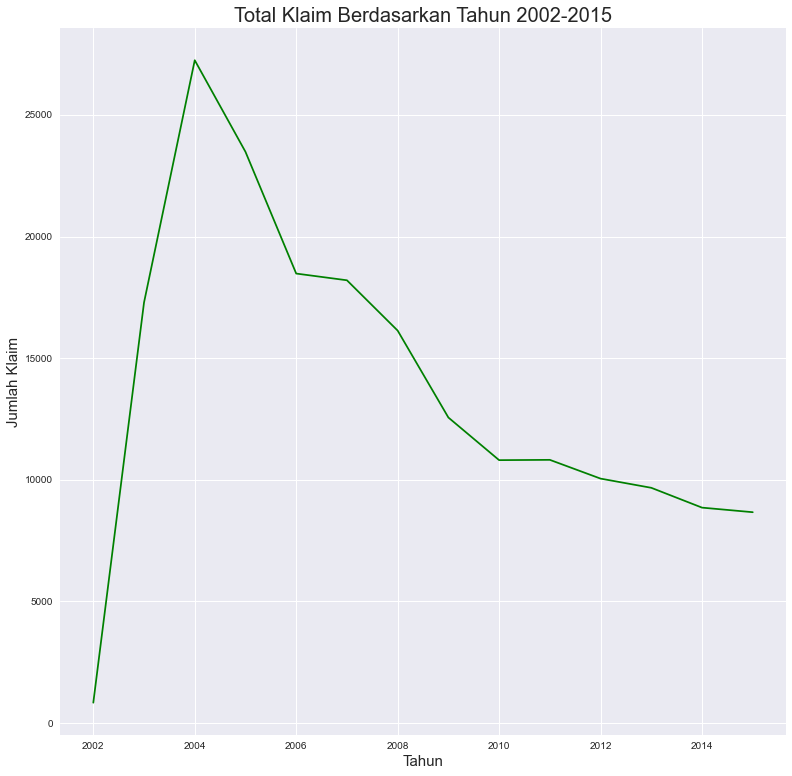

In [74]:
plt.style.use('seaborn')

plt.figure(figsize=(13,13))
plt.plot(klaimPerYear['Year'], klaimPerYear['Airport Code'], color='green')
plt.title('Total Klaim Berdasarkan Tahun 2002-2015', size=20)
plt.xlabel('Tahun', size=15)
plt.ylabel('Jumlah Klaim', size=15)
plt.show()

Dari grafik diatas bisa kita lihat bahwa dari tahun **2002** hingga tahun **2015** dengan jumlah klaim paling tinggi pada tahun **2004** selalu mengalami peningkatan yang signifikan. Puncaknya klaim tertinggi pada tahun **2004** terjadi mencapai **27.246** klaim . Kemudian, setelah tahun **2004** jumlah klaim terus melandai hingga tahun **2015**.

## Banyaknya Klaim yang Diterima Setiap Bandara

Setelah mengetahui jumlah klaim berdasarkan tahun, selanjutnya kita ingin mengetahui banyaknya klaim yang diterima pada setiap bandara yang kemudian kita akan mencari 10 bandara dengan klaim paling banyak

In [52]:
dfKlaimBandara = df[['Airport Code','Airport Name']].value_counts()
dfKlaimBandara

Airport Code  Airport Name                          
LAX           Los Angeles International Airport         9451
JFK           John F. Kennedy International             9122
EWR           Newark International Airport              6769
ORD           Chicago O'Hare International Airport      6738
MIA           Miami International Airport               6336
                                                        ... 
AHN           Athens/Ben Epps                           1   
GRO           Rota                                      1   
GON           Groton - New London; CT                   1   
ADK           Adak Mitchell Field Airport               1   
MCE           Merced Regional Airport/Macready Field    1   
Length: 465, dtype: int64

In [53]:
dfTopKlaimBandara = df[['Airport Code','Airport Name']].value_counts().head(10).to_frame().reset_index()
dfTopKlaimBandara

,Airport Code,Airport Name,0
0,LAX,Los Angeles International Airport,9451
1,JFK,John F. Kennedy International,9122
2,EWR,Newark International Airport,6769
3,ORD,Chicago O'Hare International Airport,6738
4,MIA,Miami International Airport,6336
5,MCO,Orlando International Airport,6323
6,ATL,Hartsfield-Jackson Atlanta International Airport,5792
7,SEA,Seattle-Tacoma International,5344
8,PHX,Phoenix Sky Harbor International,4994
9,LAS,McCarran International,4991


In [54]:
dfTopKlaimBandara.rename(columns = {0:'Jumlah Klaim'}, inplace = True)
dfTopKlaimBandara

,Airport Code,Airport Name,Jumlah Klaim
0,LAX,Los Angeles International Airport,9451
1,JFK,John F. Kennedy International,9122
2,EWR,Newark International Airport,6769
3,ORD,Chicago O'Hare International Airport,6738
4,MIA,Miami International Airport,6336
5,MCO,Orlando International Airport,6323
6,ATL,Hartsfield-Jackson Atlanta International Airport,5792
7,SEA,Seattle-Tacoma International,5344
8,PHX,Phoenix Sky Harbor International,4994
9,LAS,McCarran International,4991


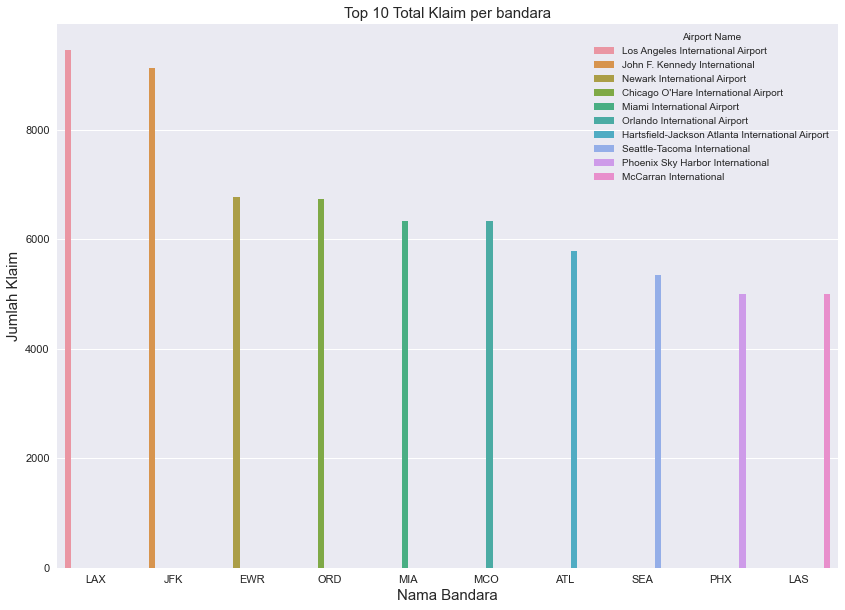

In [71]:
plt.figure(figsize=(14,10))
sns.barplot(data=dfTopKlaimBandara, x='Airport Code',y='Jumlah Klaim',hue='Airport Name')
plt.title('Top 10 Total Klaim per bandara', size=15)
plt.xticks(size=11)
plt.xlabel('Nama Bandara', size=15)
plt.yticks(size=11)
plt.ylabel('Jumlah Klaim', size=15)
plt.show()

Dari Grafik di atas , kita dapatkan informasi bandara dengan jumlah klaim terbanyak terdapat di bandara Los Angeles International Airport dan John F. Kennedy International Airport. Angka yang tinggi tersebut bisa terjadi salah satunya karena kedua bandara tersebut merupakan bandara yang paling sibuk di Amerika Serikat (source: https://www.usatoday.com/story/travel/news/2022/10/15/what-is-the-busiest-airport/10341892002/)

## Tipe Klaim yang Paling Sering Diajukan

In [56]:
dfTipeKlaim = df.groupby('Claim Type',as_index=False)['Claim Type'].value_counts()
dfTipeKlaim = dfTipeKlaim.sort_values(by='count',ascending=False)
dfTipeKlaim.rename(columns = {"count":'Jumlah Klaim'}, inplace = True)
dfTipeKlaim

,Claim Type,Jumlah Klaim
6,Passenger Property Loss,113774
9,Property Damage,70916
5,Other,5656
8,Personal Injury,1427
3,Employee Loss (MPCECA),469
7,Passenger Theft,446
4,Motor Vehicle,343
1,Complaint,47
10,Wrongful Death,4
2,Compliment,3


In [57]:
df['Claim Type'].value_counts()/df.shape[0]*100

Passenger Property Loss    58.924003
Property Damage            36.727676
Other                      2.929265 
Personal Injury            0.739049 
Employee Loss (MPCECA)     0.242897 
Passenger Theft            0.230985 
Motor Vehicle              0.177641 
Complaint                  0.024341 
Wrongful Death             0.002072 
Compliment                 0.001554 
Bus Terminal               0.000518 
Name: Claim Type, dtype: float64

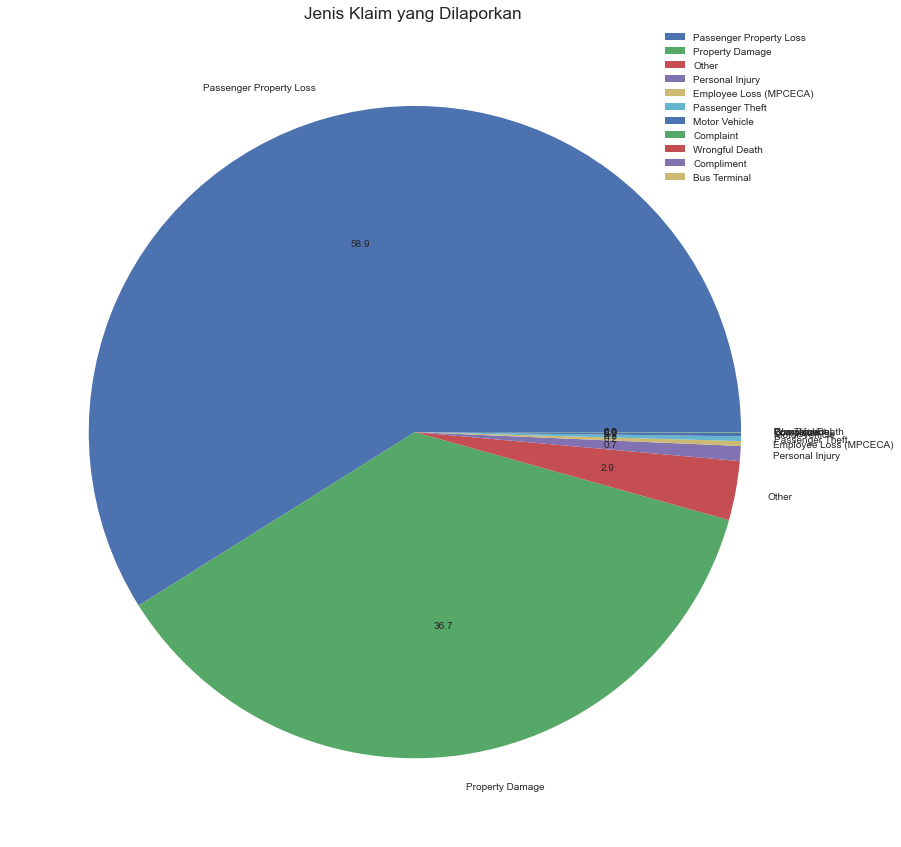

In [58]:
plt.style.use('seaborn')
plt.figure(figsize=(15,15))
plt.title('Jenis Klaim yang Dilaporkan ', size='xx-large') 
plt.pie(dfTipeKlaim['Jumlah Klaim'], labels=dfTipeKlaim['Claim Type'], autopct='%.1f')
plt.legend()
plt.show()

In [59]:
dfKlaimSite = df.groupby('Claim Site',as_index=False)['Claim Site'].value_counts()
dfKlaimSite = dfKlaimSite.sort_values(by='count',ascending=False)
dfKlaimSite.rename(columns = {"count":'Jumlah Klaim'}, inplace = True)
dfKlaimSite

,Claim Site,Jumlah Klaim
1,Checked Baggage,152463
2,Checkpoint,38230
4,Other,1940
3,Motor Vehicle,438
0,Bus Station,15


In [60]:
df['Claim Site'].value_counts()/df.shape[0]*100

Checked Baggage    78.961188
Checkpoint         19.799468
Other              1.004734 
Motor Vehicle      0.226842 
Bus Station        0.007769 
Name: Claim Site, dtype: float64

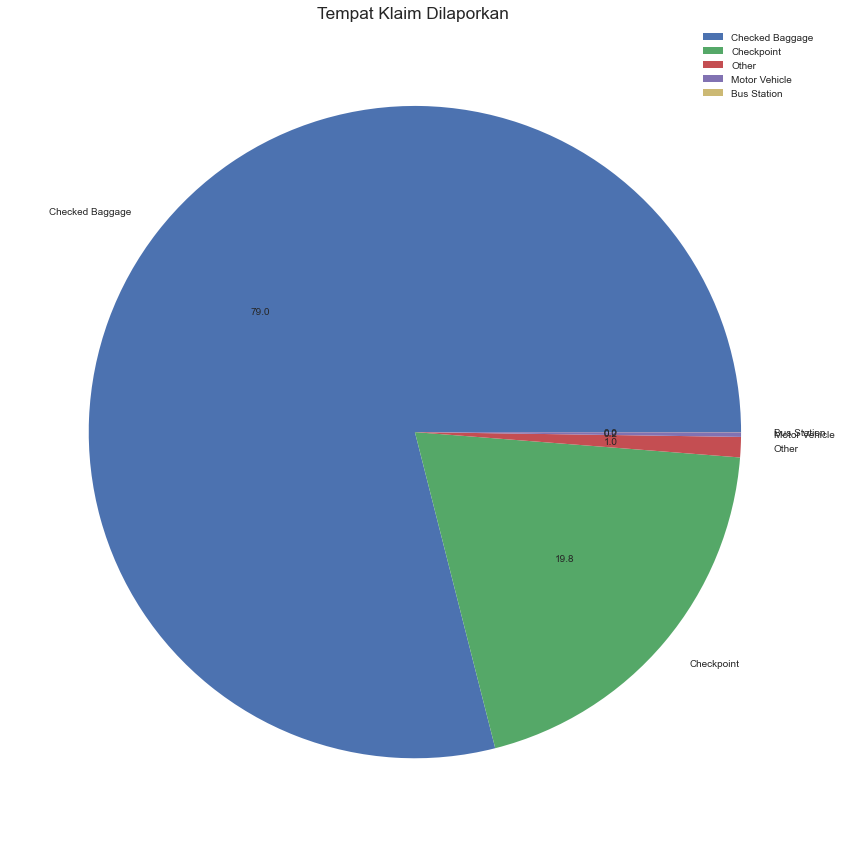

In [61]:
plt.style.use('seaborn')
plt.figure(figsize=(15,15))
plt.title('Tempat Klaim Dilaporkan ', size='xx-large') 
plt.pie(dfKlaimSite['Jumlah Klaim'], labels=dfKlaimSite['Claim Site'], autopct='%.1f')
plt.legend()
plt.show()

Dari grafik diatas, informasi yang didapatkan yaitu tipe klaim yang paling banyak diajukan yaitu berupa kehilangan properti milik penumpang dan kerusakan pada barang milik penumpang, masing masing sebesar **58,9%** dan **36,7%** dari total semua jenis klaim. Dari data tersebut kita dapat menarik informasi bahwa klaim yang diajukan oleh penumpang mayoritas berasal dari masalah properti penumpang

Kemudian informasi lokasi klaim tertinggi berada di Checked Baggage dan Check point, masing-masing sebesar **79%** dan **19,8%**. Dari data tersebut kita dapat menarik informasi bahwa tingginya klaim pada kedua lokasi tersebut diakibatkan, salah satunya, karena tingkat aktivitas penumpang yang tinggi di bandara

## Rasio Jumlah Tipe Klaim Berdasarkan Maskapai

In [62]:
dfKlaimSiteMaskapai = df.groupby('Airline Name')[['Claim Site']].value_counts()
dfKlaimSiteMaskapai = dfKlaimSiteMaskapai.loc[: , ['Checked Baggage','Checkpoint']].sort_index().to_frame().reset_index()
dfKlaimSiteMaskapai

,Airline Name,Claim Site,0
0,ATAAerocondor,Checked Baggage,265
1,ATAAerocondor,Checkpoint,55
2,AerLingus,Checked Baggage,77
3,AerLingus,Checkpoint,30
4,AeroCalifornia,Checked Baggage,3
...,...,...,...
388,WigginsAirways,Checked Baggage,1
389,XLAirways,Checked Baggage,2
390,XLAirways,Checkpoint,1
391,XtraAirways,Checked Baggage,7


In [63]:
dfKlaimSiteMaskapai['total'] = dfKlaimSiteMaskapai.groupby('Airline Name').transform('sum')[0]
dfKlaimSiteMaskapai = dfKlaimSiteMaskapai.sort_values(['total', 'Airline Name'], ascending=False)
dfKlaimSiteMaskapai

,Airline Name,Claim Site,0,total
368,Undisclosed,Checked Baggage,19688,30107
369,Undisclosed,Checkpoint,10419,30107
157,DeltaAirLines,Checked Baggage,20283,24830
158,DeltaAirLines,Checkpoint,4547,24830
83,AmericanAirlines,Checked Baggage,19191,23057
...,...,...,...,...
26,AirAruba,Checked Baggage,1,1
25,AirAfrique,Checked Baggage,1,1
19,Aerolitoral,Checked Baggage,1,1
14,AeroPeru,Checked Baggage,1,1


Text(0, 0.5, 'Frekuensi')

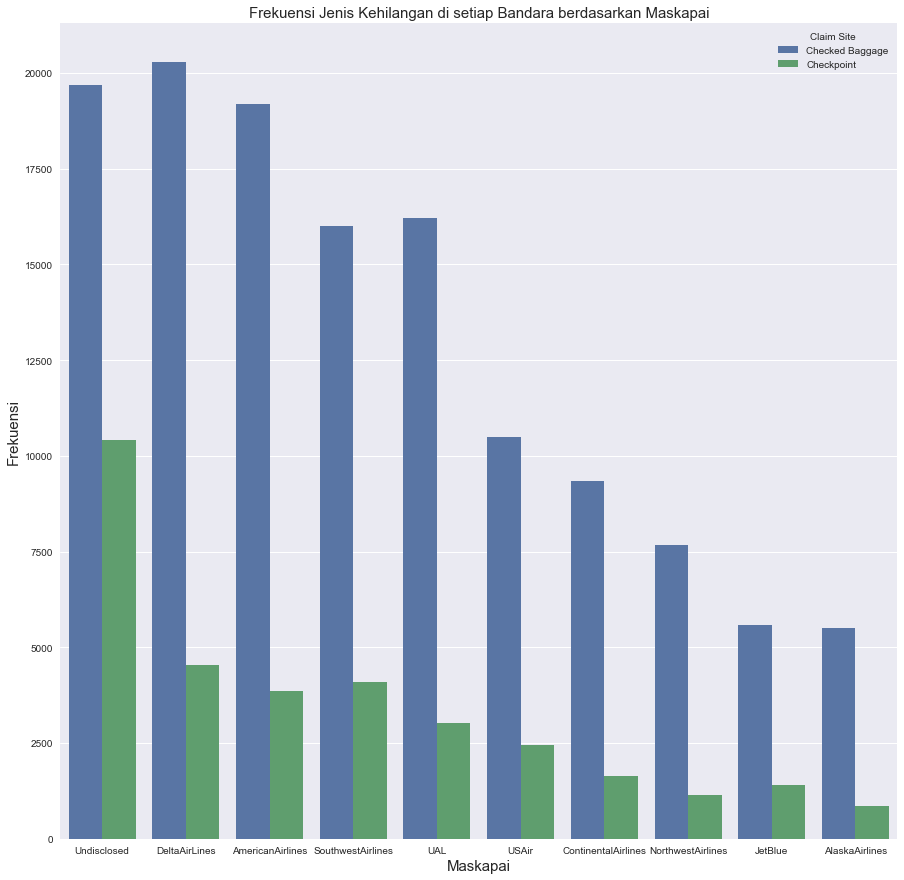

In [64]:
plt.figure(figsize=(15,15))
plt.title('Frekuensi Jenis Kehilangan di setiap Bandara berdasarkan Maskapai',size=15)
sns.barplot(data=dfKlaimSiteMaskapai.head(20),x='Airline Name',y=0,hue='Claim Site');
plt.xlabel('Maskapai',size=15)
plt.ylabel('Frekuensi',size=15)

Berdasarkan informasi yang didapatkan dari grafik diatas, tingginya jumlah lokasi *Checked Baggage* bisa jadi salah satunya disebabkan oleh banyaknya penumpang di maskapai tersebut, jadi belom tentu disebabkan faktornya oleh kelalaian dari maskapai tersebut. 

## Rasio Jumlah Tipe Klaim berdasarkan Bandara

In [65]:
# 10 Bandara dengan klaim terbanyak dari berbagai jenis
dfTipeKlaimBandara=pd.crosstab(df['Airport Code'],df['Claim Type'])
dfTipeKlaimBandara['Total']=dfTipeKlaimBandara.sum(axis=1)
dfTop10Klaim = dfTipeKlaimBandara.sort_values('Total',ascending=False).head(10)
dfTop10Klaim

Claim Type,Bus Terminal,Complaint,Compliment,Employee Loss (MPCECA),Motor Vehicle,Other,Passenger Property Loss,Passenger Theft,Personal Injury,Property Damage,Wrongful Death,Total
Airport Code,,,,,,,,,,,,
LAX,0,2,0,21,9,366,5738,24,64,3227,0,9451
JFK,0,2,0,13,9,210,6272,17,52,2547,0,9122
EWR,0,2,0,20,5,200,4260,15,36,2231,0,6769
ORD,0,0,0,24,6,202,3636,20,33,2817,0,6738
MIA,0,1,0,19,6,220,3889,13,36,2152,0,6336
MCO,0,2,0,14,4,183,4013,12,51,2044,0,6323
ATL,0,1,0,9,3,132,3530,16,44,2057,0,5792
SEA,0,1,0,16,0,178,3093,19,26,2011,0,5344
PHX,0,4,0,11,0,155,2913,14,48,1849,0,4994


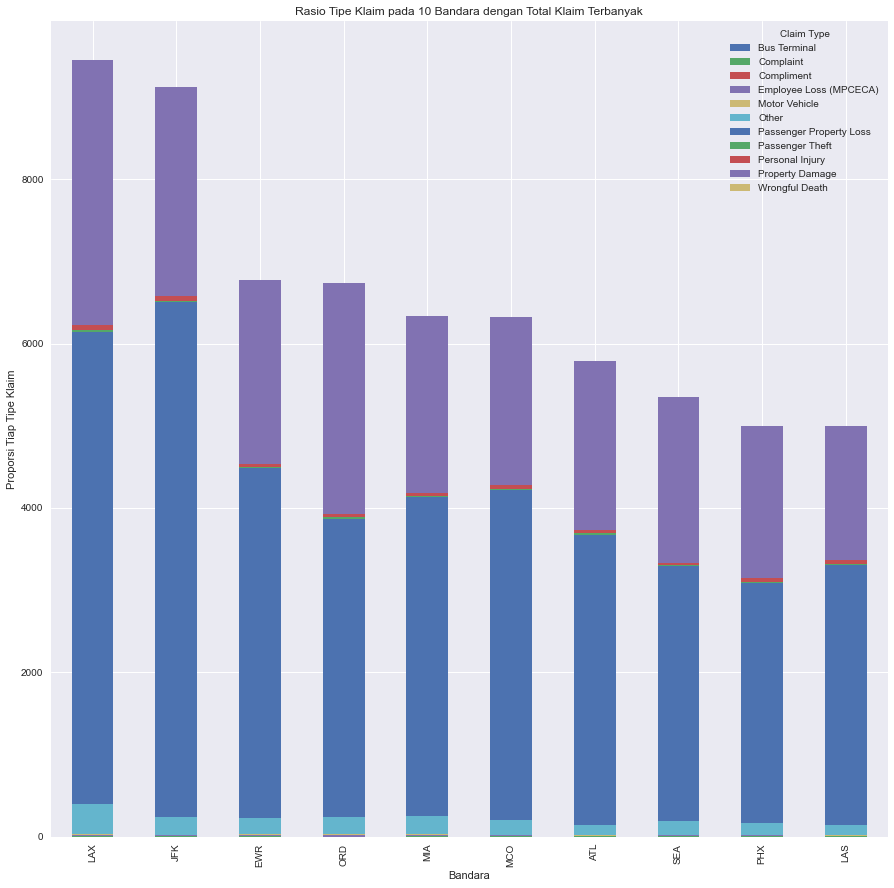

In [72]:
# Kolom total perlu dihilangkan dengan melakukan drop agar tidak masuk dalam grafik

dfTop10Klaim.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(15,15), title='Rasio Tipe Klaim pada 10 Bandara dengan Total Klaim Terbanyak', xlabel='Bandara', ylabel='Proporsi Tiap Tipe Klaim')
plt.show()

Dalam grafik tersebut didapatkan informasi bahwa tipe klaim di masing-masing bandara proporsi terbesarnya diraih oleh masalah barang milik penumpang, baik itu kehilangan ataupun kerusakan pada 10 bandara teratas.

## Rasio Lokasi Kejadian berdasarkan Bandara

In [67]:
# 10 Bandara dengan klaim terbanyak berdasarkan tempat kejadian

dfKlaimSiteBandara=pd.crosstab(df['Airport Code'],df['Claim Site'])
dfKlaimSiteBandara['Total']=dfKlaimSiteBandara.sum(axis=1)
dfTop10KlaimSite = dfKlaimSiteBandara.sort_values('Total',ascending=False).head(10)
dfTop10KlaimSite

Claim Site,Bus Station,Checked Baggage,Checkpoint,Motor Vehicle,Other,Total
Airport Code,,,,,,
LAX,1,7180,2153,8,109,9451
JFK,2,7138,1882,9,91,9122
EWR,2,5548,1138,7,74,6769
ORD,1,5315,1336,8,78,6738
MIA,0,5319,960,5,52,6336
MCO,0,4957,1309,3,54,6323
ATL,1,4454,1287,2,48,5792
SEA,0,4310,991,2,41,5344
PHX,0,4107,843,0,44,4994


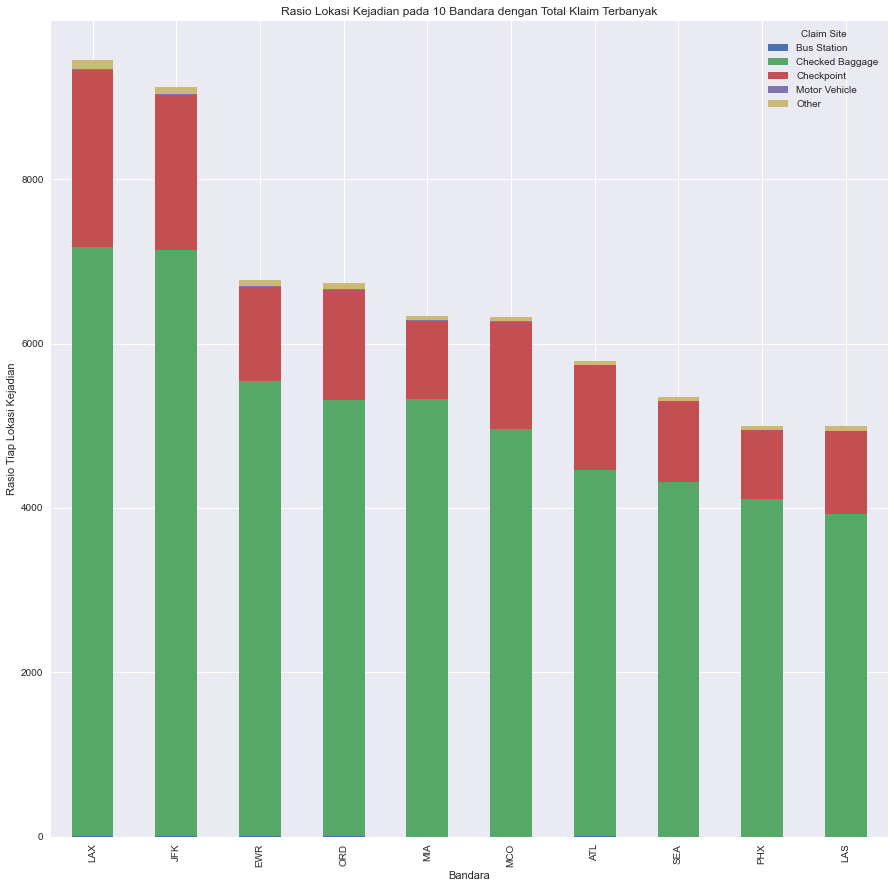

In [68]:
# Kolom total perlu dihilangkan dengan melakukan drop agar tidak masuk dalam grafik

dfTop10KlaimSite.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(15,15), title='Rasio Lokasi Kejadian pada 10 Bandara dengan Total Klaim Terbanyak', xlabel='Bandara', ylabel='Rasio Tiap Lokasi Kejadian')
plt.show()

Dalam grafik tersebut didapatkan informasi bahwa lokasi kejadian di masing-masing bandara proporsi terbesarnya diraih di lokasi pengecekan bagasi dan checkpoint, kedua lokasi tersebut merupakan lokasi yang memiliki tingkat kepadatan dan aktivitas penumpang yang tinggi pada 10 bandara teratas.

# Kesimpulan dan Saran

## Kesimpulan

Dari hasil analisis diatas ita dapat menarik kesimpulan untuk menjawab pernyataan masalah **"Bagaimana karakteristik data pengajuan klaim yang dibuat oleh para penumpang"** sebagai berikut:

* Terdapat 465 bandara dengan klaim sebanyak 193.086 klaim dari tahun 2002 hingga 2015
* Total jumlah klaim paling tinggi pada tahun **2004** dan paling rendah pada tahun **2002**,
* **Bandara LAX (Los Angeles International Airport)** menjadi bandara dengan total klaim tertinggi dengan nilai klaim sebanyak 9451, diikuti oleh **Bandara JFK (John F. Kennedy International Airport)** dengan nilai klaim sebanyak 9122 dan **bandara Newark International Airport** dengan nilai klaim sebanyak 6769,
* Tipe klaim yang paling banyak diajukan yaitu berupa kehilangan properti milik penumpang dan kerusakan pada barang milik penumpang, masing masing sebesar **58,9%** dan **36,7%** dari total semua jenis klaim,
* Lokasi klaim tertinggi berada di *Checked Baggage dan Check point*, masing-masing sebesar **79%** dan **19,8%**.
* Lokasi kejadian di masing-masing bandara proporsi terbesarnya diraih di lokasi pengecekan bagasi dan checkpoint,
* Tingginya jumlah lokasi *Checked Baggage dan Check point* bisa jadi disebabkan oleh banyaknya penumpang di bandara maupun maskapai tersebut


## Saran

Dari kesimpulan diatas dan terjawabnya pernyataan masalah yang ada, maka ada saran atau rekomendasi bagi TSA untuk mengatasinya sebagai berikut:

* Peningkatan sistem keamanan perlu dilakukan TSA terhadap bandara dan maskapai yang memiliki jumlah penumpang yang tinggi,

* Lokasi *Checked Baggage dan Check point* perlu diperhatikan lebih lanjut dengan menambahkan petugas untuk menjaga barang penumpang serta diperlukan penangan barang penumpang dengan hati-hati. Bisa dengan menyediakan fasilitas *wrapping* yang aman untuk barang penumpang dan dengan menambahkan cctv di setiap titik padat aktivitas penumpang bandara.

* Dibuatnya *warning sign* di lokasi yang padat aktivitas penumpang untuk meningkatkan *awareness* penumpang terhadap barang bawaan penumpang

* TSA pun perlu menjalin komunikasi yang baik dengan maskapai sehingga terjadi kerjasama yang baik dalam menangani masalah yang dihadapi penumpang seperti kerusakan barang maupun kehilangan barang, sehingga *tracking* dapat dilakukan dengan baik

In [70]:
df.to_csv("TSAClaim_filtere.csv", index=False)